In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [25]:
df=pd.read_csv('50_Startups.csv')
df['State'].unique()
df=df.sample(frac=1,random_state=42)
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
13,91992.39,135495.07,252664.93,California,134307.35
39,38558.51,82982.09,174999.30,California,81005.76
30,61994.48,115641.28,91131.24,Florida,99937.59
45,1000.23,124153.04,1903.93,New York,64926.08
17,94657.16,145077.58,282574.31,New York,125370.37


(array([0, 1, 2]),
 [Text(0, 0, 'New York'), Text(1, 0, 'Florida'), Text(2, 0, 'California')])

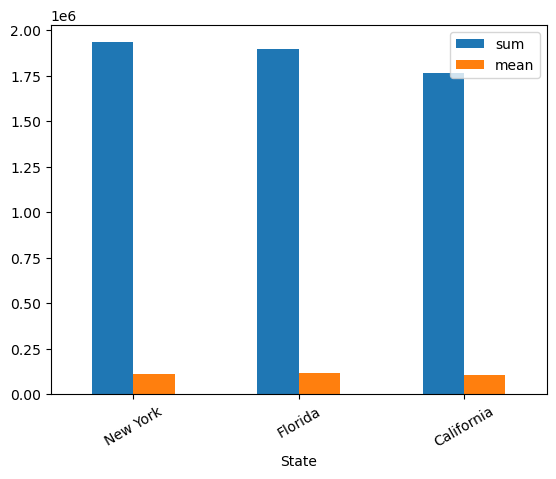

In [30]:
df.groupby('State')['Profit'].agg(['sum','mean']).sort_values(by='sum', ascending=False).plot(kind='bar')
plt.xticks(rotation=30)

In [22]:
for col in df.columns:
    if (df[col].dtype=='object'):
        df[col]=df[col].astype("category")
        df[col]=df[col].cat.codes

<function matplotlib.pyplot.show(close=None, block=None)>

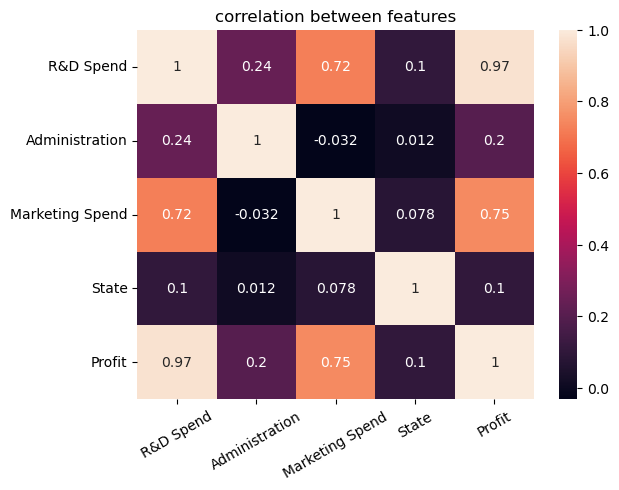

In [23]:
sns.heatmap(df.corr(), annot=True)
plt.xticks(rotation=30)
plt.title('correlation between features')
plt.show

In [11]:
x=df.iloc[:,:-1]
y=df['Profit']

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y, train_size=0.8,random_state=42)

from sklearn.preprocessing import StandardScaler

scal=StandardScaler()

x_train=scal.fit_transform(x_train)
x_test=scal.transform(x_test)

In [13]:
from sklearn.neural_network import MLPRegressor

model=MLPRegressor(hidden_layer_sizes=(200, 200,200), max_iter=20000 , random_state=42)
model.fit(x_train,y_train)

MLPRegressor(hidden_layer_sizes=(200, 200, 200), max_iter=20000,
             random_state=42)

In [14]:
ypred=model.predict(x_test)

In [15]:
mae=metrics.mean_absolute_error(y_test,ypred)
mae

11683.159906509924

In [16]:
lin_model=LinearRegression()
lin_model.fit(x_train,y_train)

LinearRegression()

In [17]:
linypred=lin_model.predict(x_test)

In [18]:
mae=metrics.mean_absolute_error(y_test,linypred)

5948.062316635737

In [21]:
print('error percentage',(mae / y.mean())*100)

error percentage 10.430215723825143
